<div style="width:100%;text-align: center;"> <img align=middle src="https://media.istockphoto.com/photos/lung-cancer-picture-id94463987?b=1&k=20&m=94463987&s=170667a&w=0&h=8Rke8kc3eAY2uP3-o8AAATY8RtPfrfcBNCuQSiVTUs4=" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

# <h1 style='background:#E0BBE4; border:0; color:white'><center>🩺Lung Cancer detection with ML Model</center></h1> 

# **<span style="color:#cd486b;">🔖What will you learn in this notebook?</span>**

> Play with dataset and try to optimize it to your use.

> Learn to scale the dataset.

> Try more than one classifier to get right predictions.

> See if **"Accuracy"** as a metric can work each time or not?

> What if precision and recall do not support accuracy values?

> Learn about how to tackle an imbalanced dataset.

> Techniques to resample your dataset to get a better fit.

# **<span style="color:#cd486b;">📰About the Dataset</span>**

The effectiveness of the cancer prediction system helps people to know their cancer risk wi a low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

# **<span style="color:#cd486b;">📁About the files</span>**

The effectiveness of the cancer prediction system helps people to know their cancer risk wi a low cost and it also helps people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

**Total no. of attributes:16**

**No .of instances:284** 

**Attribute information:**

1. Gender: M(male), F(female) 

2. Age: Age of the patient 

3. Smoking: YES=2, NO=1

4. Yellow fingers: YES=2 , NO = 1

5. Anxiety: YES=2, NO=1

6. Peer_pressure: YES=2, NO=1.

7. Chronic Disease: YES=2, NO=1. 

8. Fatigue: YES=2 , NO=1.

9. Allergy: YES=2, NO=1.

10. Wheezing: YES=2, NO=1. 

11. Alcohol: YES=2, NO=1. 

12. Coughing: YES=2, NO=1. 

13. Shortness of Breath: YES=2, NO=1

14. Swallowing Difficulty: YES=2, NO=1

15. Chest pain: YES=2, NO=1. 

16. Lung Cancer: YES, NO.

In [1]:
# Imports

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

## **<span style="color:#cd486b;">📃 Let's get the data</span>**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-detection/survey lung cancer.csv


In [4]:
df = pd.read_csv('/kaggle/input/lung-cancer-detection/survey lung cancer.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## **<span style="color:#cd486b;">📐Feature engineering and mapping</span>**

> This includes setting strings like Yes/No to integers which match with datatype of other parameters.


In [9]:
df['LUNG_CANCER']=df['LUNG_CANCER'].map({'YES':2,'NO':1})

In [10]:
df['GENDER']=df['GENDER'].map({'M':1,'F':2})

In [11]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


**<span style="color:#cd486b;"> Lets check for duplicated values</span>**

In [12]:
df[df.duplicated()]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,1,56,2,1,1,1,1,2,2,2,2,2,2,1,2,2
100,1,58,2,1,1,1,1,1,2,2,2,2,1,1,1,2
117,2,51,2,2,2,2,1,2,2,1,1,1,2,2,1,2
199,2,55,2,1,1,2,2,2,2,2,2,1,1,2,2,2
212,1,58,2,1,1,1,1,2,2,2,2,2,2,1,2,2
223,1,63,2,2,2,1,2,2,2,2,1,1,2,1,1,2
256,1,60,2,1,1,1,1,2,2,2,2,2,2,1,2,2
275,1,64,2,2,2,2,2,1,1,1,2,1,1,2,2,2
284,1,58,2,2,2,2,2,1,1,1,2,1,1,2,2,2
285,2,58,2,2,2,2,1,2,1,1,1,2,2,2,1,2


In [13]:
df.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,59,1,2,2,2,1,1,2,2,1,2,1,2,1,2
280,2,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,1
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,1


## **<span style="color:#cd486b;">🪓 Let's split the dataset</span>**

In [14]:
X = df.iloc[:,:-1]
y = df['LUNG_CANCER']  

In [15]:
X.shape

(309, 15)

In [16]:
y.shape

(309,)

In [17]:
#Split the data into train and test set (approx 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

## **<span style="color:#cd486b;">⚖ Scaling Data</span>**

**<span style="color:#FFC72C;">Since, all value points do not lie in same range, lets scale the data first</span>**

In [18]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.469388,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,1.0,0.530612,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,0.714286,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.489796,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.265306,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1.0,0.387755,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
243,0.0,0.367347,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
244,0.0,0.367347,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
245,0.0,0.265306,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


**<span style="color:#FFC72C;">We can see that all data points are now in floating points.</span>**

In [19]:
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1.0,0.964912,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.614035,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.824561,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.684211,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.736842,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.456140,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
58,0.0,0.701754,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
59,0.0,0.754386,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
60,1.0,0.771930,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


## **<span style="color:#cd486b;"> 🔥 Let's create our classification model</span>**

## **<span style="color:#cd486b;"> 1️⃣ Random Forest Classifier</span>**

In [20]:
# Model 1
model_1 = RandomForestClassifier() 

# Fit
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = model_1.predict(X_test)

In [22]:
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1 ,y_test ) 

print("Mean Absolute Error with  Random Forest classifier:" , mae_1)

Mean Absolute Error with  Random Forest classifier: 0.11290322580645161


## **<span style="color:#cd486b;">2️⃣ Support Vector Machine Classifier</span>**

In [23]:
# Model 2
model_2 = svm.SVC()

# Fit 
model_2.fit(X_train, y_train)

SVC()

In [24]:
# Make predictions calculate mean absolute error

predictions_2 = model_2.predict(X_test)
mae_2 = mean_absolute_error(predictions_2, y_test)

print("Mean Absolute Error with Support Vector Machine: {:,.0f}".format(mae_2))

Mean Absolute Error with Support Vector Machine: 0


## **<span style="color:#cd486b;">3️⃣ k Nearest neighbors </span>**

In [25]:
#Model 3
model_3 = KNeighborsClassifier(n_neighbors=5)

# Fit 
model_3.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Make predictions calculate mean absolute error

predictions_3 = model_3.predict(X_test)
mae_3 = mean_absolute_error(predictions_3, y_test)

print("Mean Absolute Error with K nearest Neighbor classifier is : {:,.0f}".format(mae_3))

Mean Absolute Error with K nearest Neighbor classifier is : 0


**<span style="color:#FFC72C;">The lower the value the better and 0 means the model is perfect.</span>**

## **<span style="color:#cd486b;">🔮 Predictions</span>**

In [27]:
print('Random Forest classifier Predictions - ', predictions_1)

Random Forest classifier Predictions -  [2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2]


In [28]:
print('Support Vector Machine classifier predictions - ', predictions_2)

Support Vector Machine classifier predictions -  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [29]:
print('K nearest neighbor classifier Predictions - ', predictions_3)

K nearest neighbor classifier Predictions -  [2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


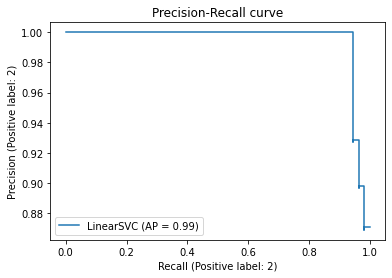

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    model_2, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [31]:
import sklearn

In [32]:
#precision score

precision_score_1 = sklearn.metrics.precision_score(y_test, predictions_1, labels=model_1.classes_)
precision_score_2 = sklearn.metrics.precision_score(y_test, predictions_2, labels=model_2.classes_)
precision_score_3 = sklearn.metrics.precision_score(y_test, predictions_3, labels=model_3.classes_)

print("Precision score for Random Forest Classifier is  ", precision_score_1)

print("Precision score for Support Vector Machine classifier is  ", precision_score_2)

print("Precision score for K nearest neighbor classifier is  ", precision_score_3)



Precision score for Random Forest Classifier is   0.5555555555555556
Precision score for Support Vector Machine classifier is   0.0
Precision score for K nearest neighbor classifier is   0.75


In [33]:
F1_model_1 = sklearn.metrics.f1_score(y_test, predictions_1, labels=model_1.classes_, pos_label=1, average='weighted', sample_weight=None)

F1_model_2 = sklearn.metrics.f1_score(y_test, predictions_2, labels=model_2.classes_, pos_label=1, average='weighted', sample_weight = None)

F1_model_3 = sklearn.metrics.f1_score(y_test, predictions_3, labels=model_3.classes_, pos_label=1, average='weighted', sample_weight = None)

print("F1 Score for Random Forest Classifier is ", F1_model_1)
print("F1 Score for Support Vector Machine classifier is ", F1_model_2)
print("F1 Score for K nearest neighbor classifier is ", F1_model_3)

F1 Score for Random Forest Classifier is  0.8898898721381829
F1 Score for Support Vector Machine classifier is  0.8109010011123471
F1 Score for K nearest neighbor classifier is  0.8888248847926267


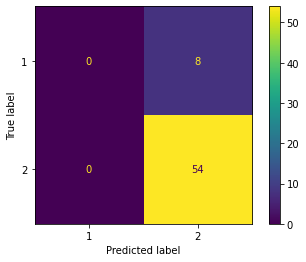

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)

cm = confusion_matrix(y_test, predictions_2, labels=model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_2.classes_)
disp.plot()

#plt.show()

**Here, 2 means accurate prediction of Lung Cancer**

## **<span style="color:#cd486b;"> ✔ Accuracy Check</span>**

In [35]:
from sklearn import metrics

accuracy_1 = metrics.accuracy_score(y_test,predictions_1)
print('Accuracy for Random Forest classifier model is - ', accuracy_1)

Accuracy for Random Forest classifier model is -  0.8870967741935484


In [36]:
accuracy_2 = metrics.accuracy_score(y_test,predictions_2)
print('Accuracy for Support Vector Machine classifier model is - ', accuracy_2)

Accuracy for Support Vector Machine classifier model is -  0.8709677419354839


In [37]:
accuracy_3 = metrics.accuracy_score(y_test,predictions_3)
print('Accuracy for K nearest neighbor classifier model is - ', accuracy_3)

Accuracy for K nearest neighbor classifier model is -  0.9032258064516129


**Since, the precision value for all above models is not optimum as compared to accuracy values. Thus, we can say that accuracy is not the metric that we would like to consider for this application. So, there is clearly some problem.**

# **<span style="color:#cd486b;">🚨Let's find the problem!!</span>**

In [38]:
y.value_counts()

2    270
1     39
Name: LUNG_CANCER, dtype: int64

## **<span style="color:#FFC72C;">☢Imbalanced dataset</span>** 

**<span style="color:#000000;"> Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class i.e number of Yes(2) labels are more than number of No(1) labels.</span>**


# **<span style="color:#cd486b;">💡 Solution</span>**

**<span style="color:#000000;">Let's try some Resampling techniques to equalise the labels.</span>**



## **<span style="color:#cd486b;">1️⃣ Under Sampling - Randomly delete examples in the majority class</span>**

**<span style="color:#cd486b;">Decresing number of samples in large class and equate them to number of samples in  the lower class with less samples.</span>**

In [39]:
# Let's try balanced Random Forest Classifier to balance the imbalanced data

brf = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)


In [40]:
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=0)

In [41]:
print("F1 score with Balanced Random Forest Classifier is ",sklearn.metrics.f1_score(y_test, brf.predict(X_test)))

F1 score with Balanced Random Forest Classifier is  0.6666666666666666


In [42]:
pre_score = sklearn.metrics.precision_score(y_test, brf.predict(X_test))
print("Precision score for Balanced Random Forest Classifier is  ", pre_score)

Precision score for Balanced Random Forest Classifier is   0.5


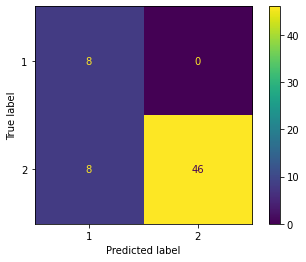

In [43]:
#Confusion Matrix

cm = confusion_matrix(y_test, brf.predict(X_test), labels=brf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=brf.classes_)
disp.plot()

## **<span style="color:#cd486b;">2️⃣ Over Sampling - Randomly duplicate examples in the minority class.</span>**

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#y labels are - 270: 39 (divide both by 309 to get weights)
X, y = make_classification(n_classes = 2, class_sep = 2, weights = [0.87, 0.12], 
                           n_informative = 3, n_redundant = 1, flip_y = 0, n_features = 20,
                          n_clusters_per_class = 1, n_samples = 309, random_state = 10)

print('Orignal dataset shape %s' % Counter(y))

Orignal dataset shape Counter({0: 270, 1: 39})


In [45]:
ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X, y)

print('Reshaped dataset shape %s' % Counter(y_res))

Reshaped dataset shape Counter({0: 270, 1: 270})


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.2, stratify = y_res)

In [47]:
model = RandomForestClassifier() 
model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
predictions = model.predict(X_test)

In [49]:
model_precision_score = sklearn.metrics.precision_score(y_test, predictions, labels=model.classes_)
print("Precision score after using Balanced Random Forest Classifier is  ", model_precision_score)

Precision score after using Balanced Random Forest Classifier is   0.9642857142857143


In [50]:
print("F1 score after Balanced Random Forest Classifier is ",sklearn.metrics.f1_score(y_test, model.predict(X_test)))

F1 score after Balanced Random Forest Classifier is  0.9818181818181818


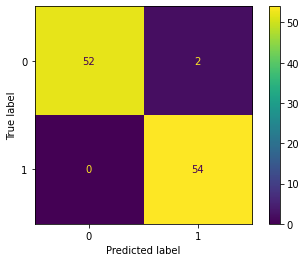

In [51]:
#Confusion Matrix

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

## **<span style="color:#cd486b;">It worked!! 🤩</span>**

**<span style="color:#cd486b;">Using oversampling technique we were able to get high precision and recall values along with high F1 score of 0.981 which can be easily witnessed using the above confusion matrix.</span>**




# **<span style="color:#cd486b;">🙏 Acknowledgement</span>**

🙌Few snippets of above code have been inspired from notebook created by @JILLANI SOFT TECH.🙌

# **<span style="color:#cd486b;">🤘Conclusion</span>**

> We learnt that accuracy is not always the optimum metric to rely upon.

> We need to make a note of imbalanced dataset and overcome their limitations using Resampling techniques like Over and under sampling.

> Augmentation techiques could also be another thing that could help work around imbalanced datasets.

**<span style="color:#000000;">This marks the end of Lung Cancer detection with ML Model</span>** 

**<span style="color:#000000;"> Stay Tuned for more..</span>** 

**<span style="color:#000000;">Please share your feedback and suggestions and help me improve 😇 </span>** 